In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Model names and corresponding CSV files
files_models = {
    'CNN\cnn_gridsearch_results.csv': 'CNN',
    'DNN\dnn_gridsearch_results.csv': 'DNN',
    'GRU\gru_gridsearch_results.csv': 'GRU',
    'KNN\knn_gridsearch_results.csv': 'KNN',
    'LR\lr_gridsearch_results.csv': 'LR',
    'LSTM\lstm_gridsearch_results.csv': 'LSTM',
}

# Metrics to include
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Normal_Detect_Rate', 'Atk_Detect_Rate']
avg_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score'] 

In [14]:
best_models = []

for file, model_name in files_models.items():
    df = pd.read_csv(file)
    df['average'] = df[avg_metrics].mean(axis=1)  # calculate average
    best_row = df.loc[df['average'].idxmax()].copy()
    best_row['Model'] = model_name
    best_models.append(best_row)

# Combine results
final_df = pd.DataFrame(best_models)
final_df = final_df[['Model'] + metrics + ['average']]
final_df.reset_index(drop=True, inplace=True)
final_df


,Model,Accuracy,Precision,Recall,F1-Score,Normal_Detect_Rate,Atk_Detect_Rate,average
0,CNN,0.999116,0.999508,0.999431,0.999470,0.997542,0.999431,0.999381
1,DNN,0.999283,0.999302,0.999838,0.999570,0.996507,0.999838,0.999498
2,GRU,0.999219,0.999719,0.999343,0.999531,0.998596,0.999343,0.999453
3,KNN,0.999087,0.999593,0.999312,0.999452,0.997964,0.999312,0.999361
4,LR,0.998490,0.998891,0.999298,0.999094,0.994453,0.999298,0.998943
5,LSTM,0.997613,0.999560,0.997574,0.998566,0.997806,0.997574,0.998328


Accuracy

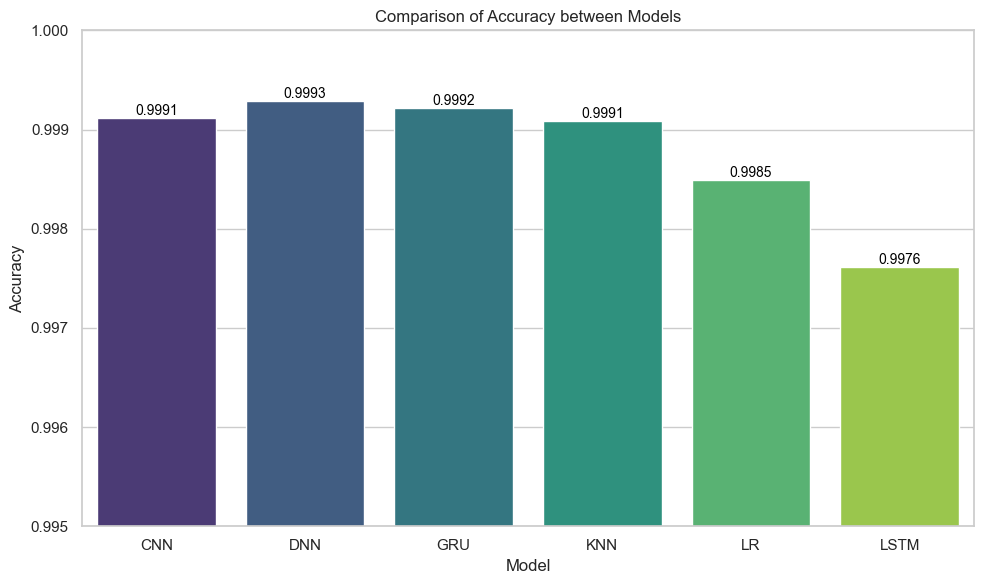

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Model", y="Accuracy", hue="Model", data=final_df, palette="viridis", legend=False
)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.4f}",  
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black')

plt.title("Comparison of Accuracy between Models")
plt.ylabel("Accuracy")
plt.ylim(0.995, 1.0)
plt.xlabel("Model")

plt.tight_layout()
plt.show()

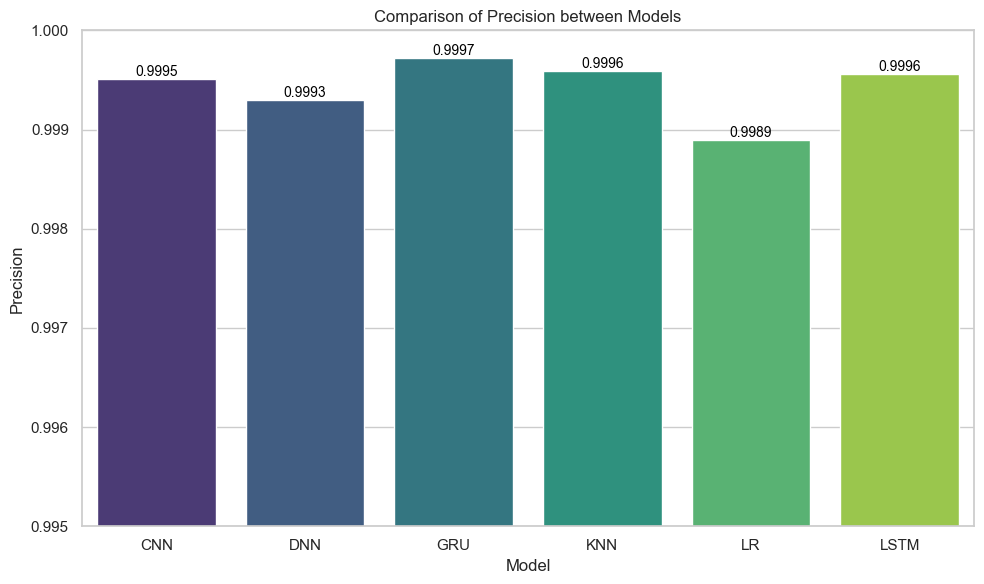

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Precision", hue="Model", data=final_df, palette="viridis", legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.4f}", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')
plt.title("Comparison of Precision between Models")
plt.ylabel("Precision")
plt.ylim(0.995, 1.0)
plt.xlabel("Model")
plt.tight_layout()
plt.show()

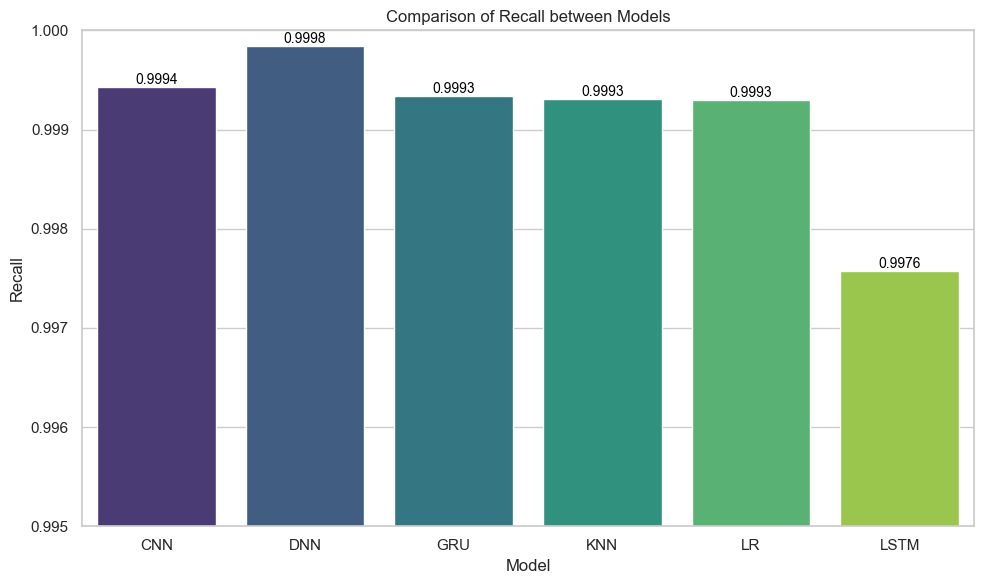

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Recall", hue="Model", data=final_df, palette="viridis", legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.4f}", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')
plt.title("Comparison of Recall between Models")
plt.ylabel("Recall")
plt.ylim(0.995, 1.0)
plt.xlabel("Model")
plt.tight_layout()
plt.show()

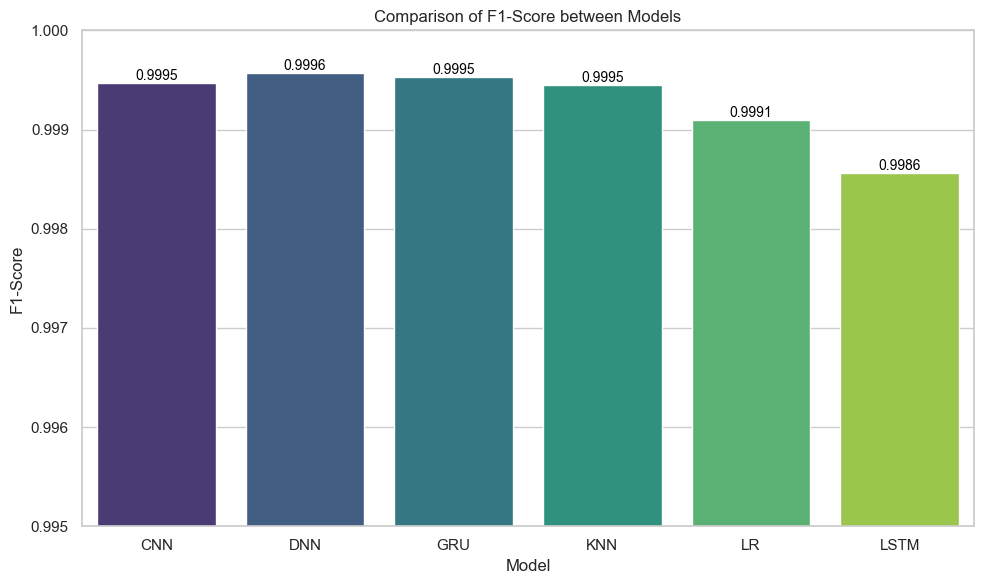

In [20]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="F1-Score", hue="Model", data=final_df, palette="viridis", legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.4f}", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')
plt.title("Comparison of F1-Score between Models")
plt.ylabel("F1-Score")
plt.ylim(0.995, 1.0)
plt.xlabel("Model")
plt.tight_layout()
plt.show()

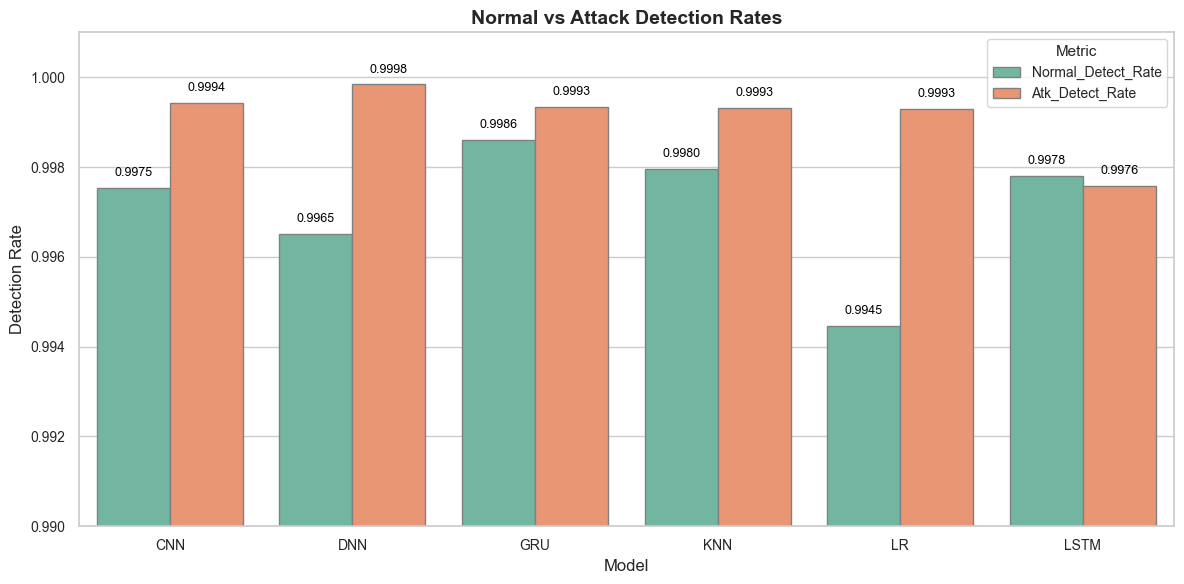

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Model', y='Value', hue='Metric',
    data=detect_df, palette='Set2', edgecolor='gray', linewidth=1
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.4f}",
                (p.get_x() + p.get_width() / 2., height + 0.0002),
                ha='center', va='bottom',
                fontsize=9, color='black')

plt.title("Normal vs Attack Detection Rates", fontsize=14, weight='bold')
plt.ylim(0.99, 1.001)
plt.ylabel("Detection Rate", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Metric', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16448\1662679064.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


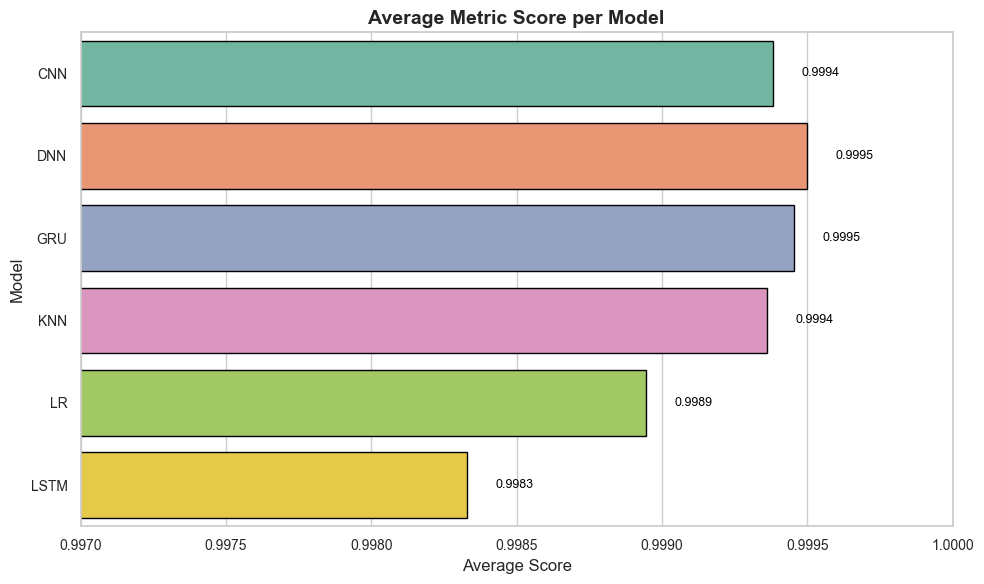

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y='Model', x='average',       
    data=final_df,
    palette='Set2',         
    edgecolor='black',
    linewidth=1,
    legend=False
)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{width:.4f}",
                (width + 0.0001, p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=9, color='black')

plt.title("Average Metric Score per Model", fontsize=14, weight='bold')
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0.997, 1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()